## Diseño del modelo (paso a paso)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar el dataset
df = pd.read_csv('C:\\Users\\manue\\Documents\\extraccion_conocimientos\\uteq\\Evaluacion\\datasets\\samsung.csv')
df_numerico = df[['Close', 'Volume']]
df_numerico.head()

,Close,Volume
0,10880,18047200
1,10920,19346500
2,10780,17997350
3,10380,39787200
4,10320,24783700


### Análisis exploratorio de las variables

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2850 non-null   object
 1   Close   2850 non-null   int64 
 2   Volume  2850 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.9+ KB


,Close,Volume
count,2850.000000,2.850000e+03
mean,26611.305263,1.610505e+07
std,11991.608543,8.661794e+06
min,8040.000000,0.000000e+00
25%,16300.000000,1.021426e+07
50%,25600.000000,1.359033e+07
75%,30850.000000,1.960970e+07
max,57220.000000,6.487345e+07


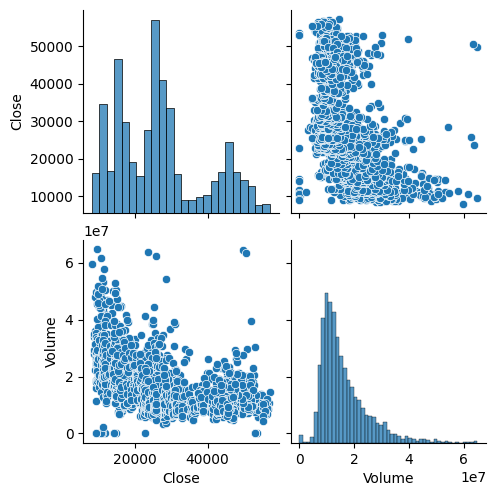

In [18]:
# Visualización de la dispersión
sns.pairplot(df)
plt.show()

### Preprocesamiento de datos
Se escalan los datos para mejorar el desempeño del algoritmo.

In [19]:
# Seleccionar solo columnas numéricas para el agrupamiento
df_numerico = df.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)

## Selección del número óptimo de clústeres

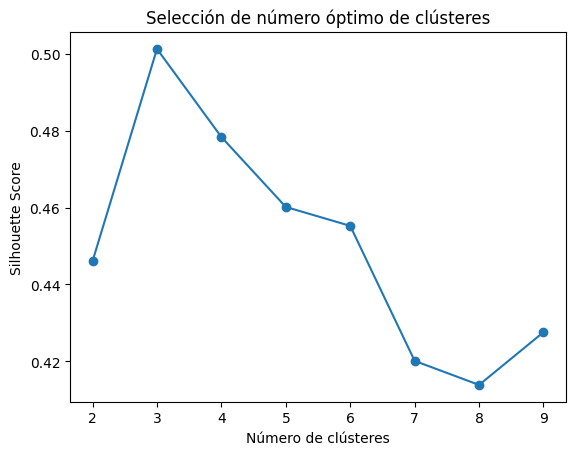

In [20]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
plt.plot(range(2,10), scores, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Silhouette Score')
plt.title('Selección de número óptimo de clústeres')
plt.show()

In [22]:
# Entrenamiento final con el número óptimo de clústeres (Con la grafica se ve que el mejor es el 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

## Gráficas personalizadas e interpretación de resultados

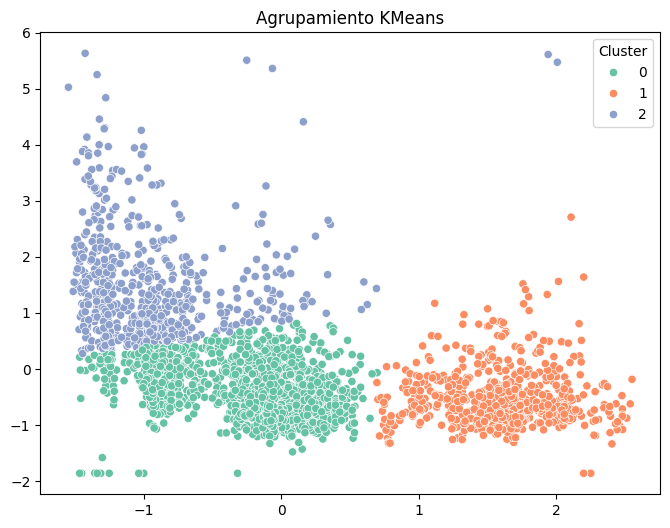

In [23]:
# Visualización de los clústeres
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['Cluster'], palette='Set2')
plt.title('Agrupamiento KMeans')
plt.show()

## Interpretación de resultados
Cada clúster representa un segmento de ventas con características similares. El análisis permite identificar patrones y tomar decisiones estratégicas.

## Optimización del modelo
El número de clústeres se seleccionó usando la métrica de Silhouette Score.